[-1.0, -0.33333333333333337, 0.33333333333333326, 1.0]


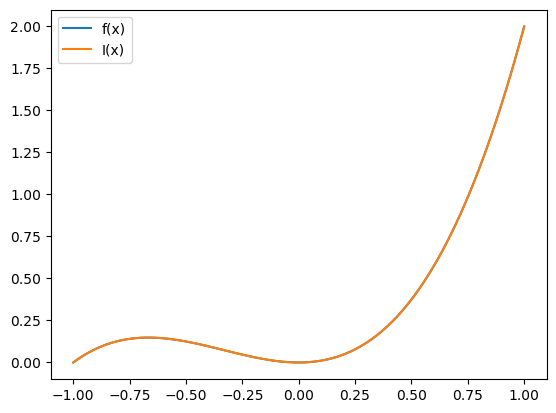

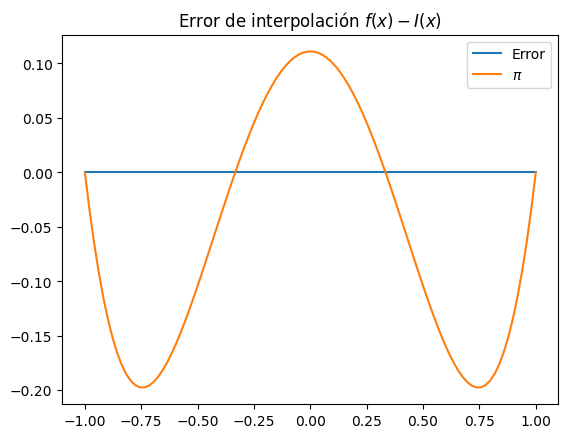

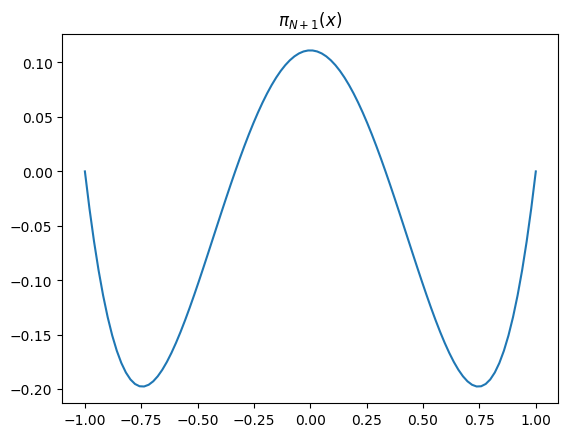

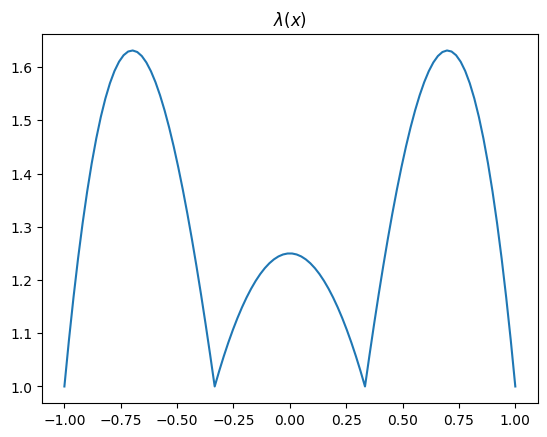

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def puntos(num):
    x0=[]
    for i in range(num):
        x0.append(-1+2*i/(num-1))
    return x0
x0 = puntos(4)
print(x0)
def li(i,x):
    l=1
    for k in range(len(x0)):
       if i!=k:
        l*= (x-x0[k])/(x0[i]-x0[k])
    return l

def I(func,x):
    I=0
    for i in range(len(x0)):
       I+= func(x0[i]) * li(i,x)
    return I

def E(f,x):
    return f(x)-I(f,x)

def PI(x):
    p = 1
    for i in range(len(x0)):
        p*=(x-x0[i])
    return p

def Leb(x):
    L = 0
    for i in range(len(x0)):
        L+= abs(li(i,x))
    return L

def maxmin(f,res=10**5,a=-1,b=1):
    equis = np.linspace(a,b,res)
    maxim = []
    minim = []
    for i in range(1,len(equis)-1,1):
        x1,x2,x3 = [equis[i-1],equis[i],equis[i+1]]
        f1,f2,f3 = [f(x1),f(x2),f(x3)]
        if f2>f1 and f2>f3:
            maxim.append([f2,x2])
        elif f2<f1 and f2<f3:
            minim.append([f2,x2])
    return maxim,minim

def If(x):
    return I(f,x)
def Ig(x):
    return I(g,x)

def f(x):
    return x**3 + x**2

def g(x):
    return x

res = 10**2
xd = np.linspace(-1,1,res)
fd = f(xd)
Id = If(xd)
Ed = E(f,xd)
PId = PI(xd)
Ld = Leb(xd)
plt.plot(xd,fd,label = 'f(x)')
plt.plot(xd,Id,label = 'I(x)')
plt.legend()
plt.show()

plt.title('Error de interpolación $f(x)-I(x)$')
plt.plot(xd,Ed,label='Error')
plt.plot(xd,PId,label=r'$\pi$')
plt.legend()
plt.show()

plt.title(r'$\pi_{N+1}(x)$')
plt.plot(xd,PId)
plt.show()

plt.title(r'$\lambda(x)$')
plt.plot(xd,Ld)
plt.show()